# Trabajo Práctico 4

## Imports

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

## Carga y limpieza de datos

#### Levantamos papers del csv

In [3]:
with open('data.csv', 'r') as f:
    rows = [[c.strip() for c in l.split(',', 4)]
             for l in f]


In [4]:
papers = pd.DataFrame(rows, columns=['year', 'id', 'journal', 'authors', 'title'])

In [5]:
papers.head()

,year,id,journal,authors,title
0,1992,B368,Nucl.Phys.,Horne & Horowitz,Exact Black String Solutions in Three Dimensions
1,1992,B278,Phys. Lett.,Mikovic,Hamiltonian construction of W-gravity actions
2,1991,A6,Mod. Phys. Lett.,Huitu & Nemeschansky,Supersymmetric Gelfand-Dickey Algebra
3,1992,B373,Nucl.Phys.,Witten,Ground Ring Of Two Dimensional String Theory
4,1991,A6,Mod.Phys.Lett.,Intriligator,Fusion Residues


####  Limpiamos los datos

In [6]:
banned_indexs = [2114, 6166, 6167, 6396, 6397, 6398, 7189]

In [7]:
papers.loc[banned_indexs]

,year,id,journal,authors,title
2114,1994,B328,Phys.Lett.,Nikolaev & Zakharov & IKP & Juelich & Juelich ...,The spectrum and solutions of the generalized ...
6166,1995,B349,lectures in Formation and Interactions of Topo...,,None
6167,NATO ASI B349,ed A.-C. Davis,R.,Carter,Dynamics of Cosmic Strings and other Brane models
6396,1997,P21,GROUP21,Physical Applications and Mathematical Aspects of,None
6397,Geometry,Groups and Algebras,vol. 2,eds. H.-D. Doebner e.a. World Sci.,
6398,Singapore,1997) p.,Kanatchikov,Novel algebraic structures from the polysymple...,None
7189,1998,E57,Phys.Rev.,Caiani & Casetti & Clementi & Pettini & Pettin...,Geometry of dynamics and phase transitions in ...


In [8]:
papers = papers.drop(papers.index[banned_indexs])

In [9]:
papers.to_csv('data.limpia.csv')

## 1. Creación del grafo

#### Extraemos todos los autores

In [10]:
papers = pd.read_csv('data.limpia.csv')

In [11]:
def authors_from_text(text):
    "Devuelve la lista de autores de texto como 'A & B & C'"
    s = text.split('&')
    return [x.strip() for x in s]

In [12]:
authors = [author
           for text in papers['authors']
           for author in authors_from_text(text)]

#### Extraemos las coautorías

In [13]:
import itertools
co_authors = [list(itertools.combinations(authors_from_text(authors), 2))
              for authors in papers['authors']]
co_authors = [x for x in co_authors if len(x) != 0]
co_authors = [co_autoria 
              for co_autorias in co_authors
              for co_autoria in co_autorias]

#### Creamos el grafo

In [14]:
import networkx as nx

In [15]:
grafo_citas = nx.Graph()

In [16]:
grafo_citas.add_nodes_from(authors)

In [17]:
grafo_citas.add_edges_from(co_authors)

In [38]:
print('Cantidad de nodos: {}'.format(len(grafo_citas.nodes())))
print('Cantidad de ejes: {}'.format(len(grafo_citas.edges())))

Cantidad de nodos: 4003
Cantidad de ejes: 7807


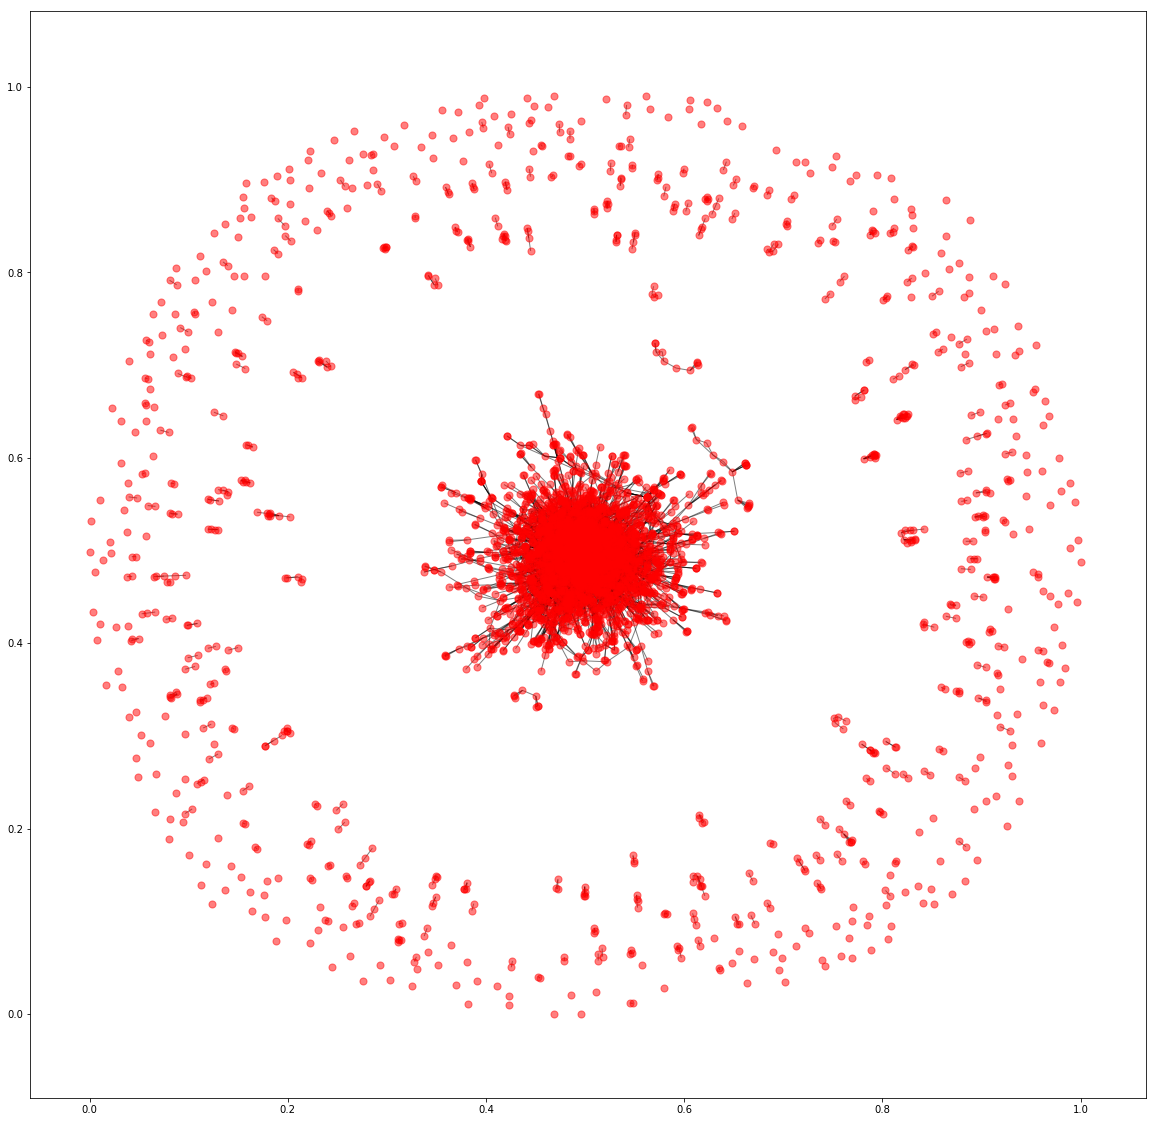

In [106]:
plt.figure(figsize(20, 20))
nx.draw_networkx(grafo_citas, with_labels=False, node_size=50, alpha=0.5)

###  2. Distribución de Grado

In [41]:
grados = grafo_citas.degree()

In [50]:
import collections 
count = collections.Counter(sorted(grados.values()))

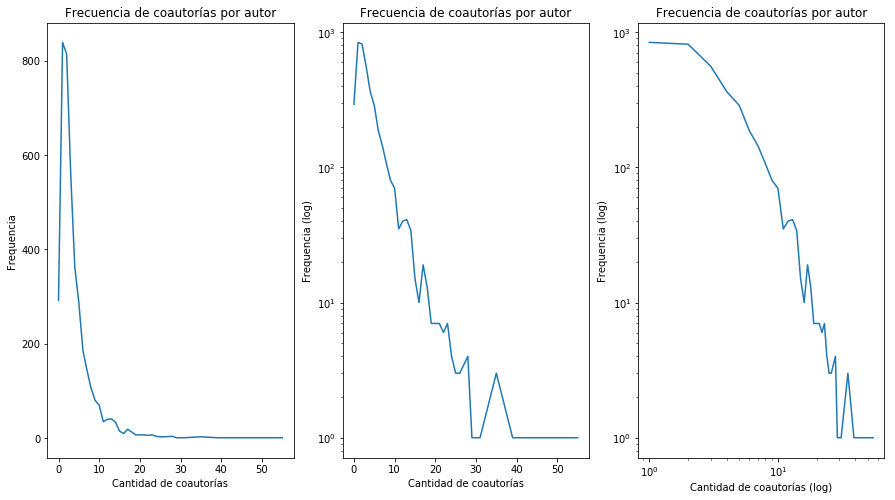

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 8))
xs = list(count.keys())
ys = list(count.values())

sca(axs[0])
plot(list(count.keys()), list(count.values()))
xlabel('Cantidad de coautorías')
ylabel('Frequencia')
title('Frecuencia de coautorías por autor')

sca(axs[1])
semilogy(list(count.keys()), list(count.values()))
xlabel('Cantidad de coautorías')
ylabel('Frequencia (log)')
title('Frecuencia de coautorías por autor')

sca(axs[2])
loglog(list(count.keys()), list(count.values()))
xlabel('Cantidad de coautorías (log)')
ylabel('Frequencia (log)')
title('Frecuencia de coautorías por autor')

Eliminamos las colas (vemos hasta 30 co-autorías y eliminamos los autores sin co-autorías)

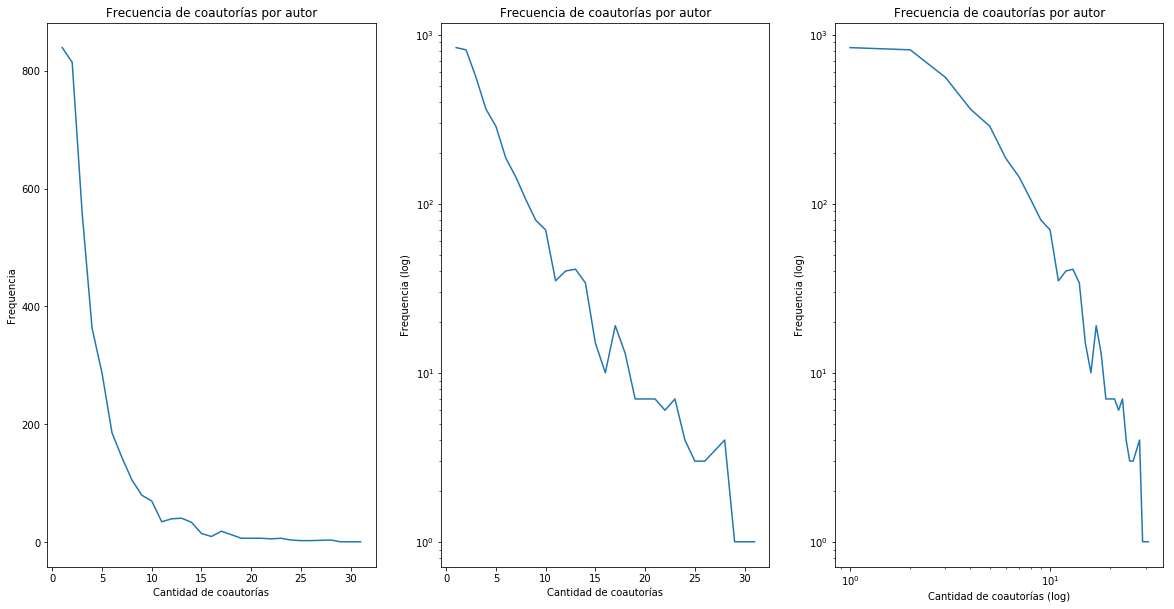

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
sca(axs[0])
plot(xs[1:30], ys[1:30])
xlabel('Cantidad de coautorías')
ylabel('Frequencia')
title('Frecuencia de coautorías por autor')

sca(axs[1])
semilogy(xs[1:30], ys[1:30])
xlabel('Cantidad de coautorías')
ylabel('Frequencia (log)')
title('Frecuencia de coautorías por autor')

sca(axs[2])
loglog(xs[1:30], ys[1:30])
xlabel('Cantidad de coautorías (log)')
ylabel('Frequencia (log)')
title('Frecuencia de coautorías por autor')

In [98]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [105]:
exp_res = sm.OLS(np.log(ys[1:]), xs[1:]).fit()
print('Exp R^2: {:.4f}'.format(exp_res.rsquared))
power_res = sm.OLS(np.log(ys[1:]), np.log(xs[1:])).fit()
print('Power-law R^2: {:.4f}'.format(power_res.rsquared))

Exp R^2: 0.1475
Power-law R^2: 0.3535
